# https://github.com/HusainZafar/TransferLearningTutorial/blob/master/Re-train%20multiple%20layers/second.ipynb

In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

Using TensorFlow backend.


# Re-training multiple layers of Inception

Note: Ignore the results. This repo is only to demonstrate the process


In [2]:
base_model = InceptionV3(weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 90s 1us/step


In [3]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

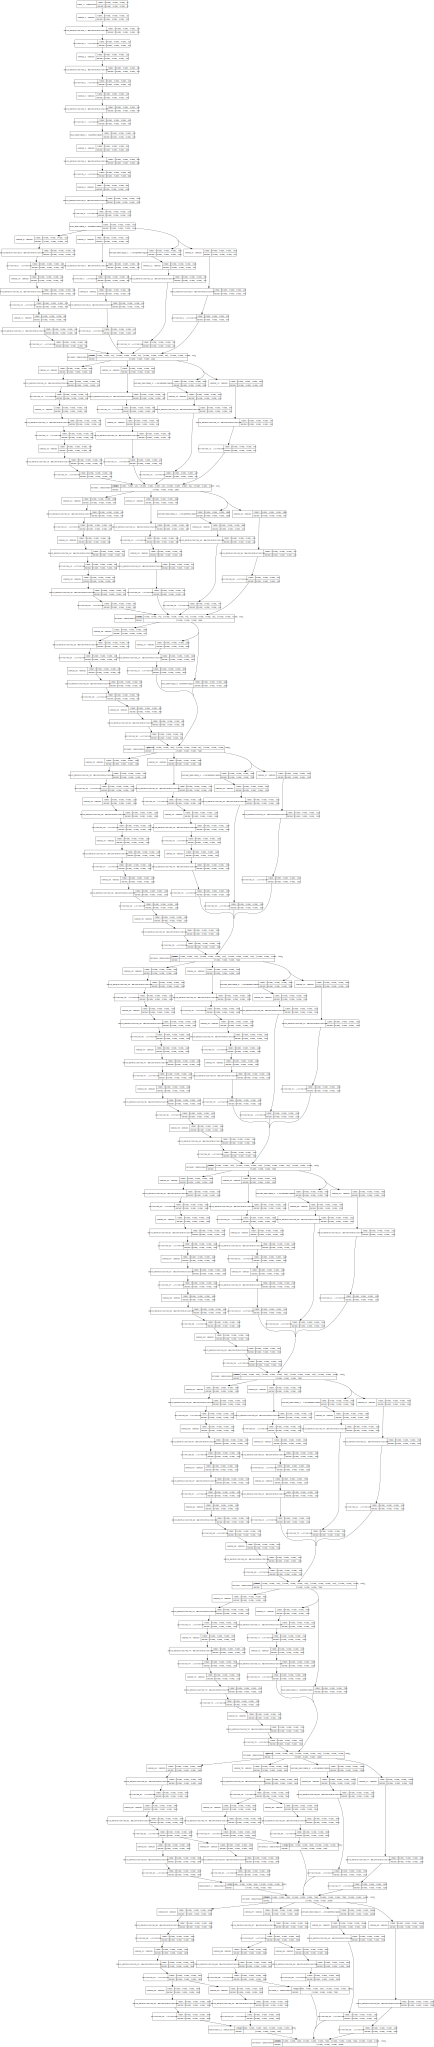

In [5]:
SVG(model_to_dot(base_model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
from keras.utils import plot_model

In [10]:
plot_model(base_model, to_file='ORIGINAL INCEPTION.png')

In [8]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 2 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [12]:
plot_model(model, to_file='MODIFIED INCEPTION.png')

In [13]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [14]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [15]:
import numpy as np

In [17]:
data = np.load('train.npy')
labels = np.load('tlabels.npy')

In [18]:
model.fit(data, labels, batch_size=25, epochs=10, verbose=1, callbacks=None, validation_split=0.3, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0)

Train on 35 samples, validate on 15 samples
Epoch 1/10
35/35 [==============================] - 18s 506ms/step - loss: 1.3377 - val_loss: 5.3727
Epoch 2/10
35/35 [==============================] - 11s 317ms/step - loss: 6.6999 - val_loss: 3.7814
Epoch 3/10
35/35 [==============================] - 11s 308ms/step - loss: 1.3874 - val_loss: 10.7454
Epoch 4/10
35/35 [==============================] - 12s 343ms/step - loss: 2.9043 - val_loss: 5.3727
Epoch 5/10
35/35 [==============================] - 11s 320ms/step - loss: 1.3417 - val_loss: 5.3727
Epoch 6/10
35/35 [==============================] - 11s 313ms/step - loss: 0.9884 - val_loss: 5.3727
Epoch 7/10
35/35 [==============================] - 11s 311ms/step - loss: 0.1703 - val_loss: 5.3727
Epoch 8/10
35/35 [==============================] - 11s 315ms/step - loss: 0.1672 - val_loss: 5.3727
Epoch 9/10
35/35 [==============================] - 11s 310ms/step - loss: 0.1202 - val_loss: 5.3727
Epoch 10/10
35/35 [===========================

In [19]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [20]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

In [21]:
model.fit(data, labels, batch_size=25, epochs=10, verbose=1, callbacks=None, validation_split=0.3, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0)

Train on 35 samples, validate on 15 samples
Epoch 1/10
35/35 [==============================] - 27s 769ms/step - loss: 1.5330 - val_loss: 10.7454
Epoch 2/10
35/35 [==============================] - 22s 621ms/step - loss: 1.7887 - val_loss: 10.7454
Epoch 3/10
35/35 [==============================] - 13s 382ms/step - loss: 1.4968 - val_loss: 10.7454
Epoch 4/10
35/35 [==============================] - 13s 382ms/step - loss: 1.3804 - val_loss: 10.7454
Epoch 5/10
35/35 [==============================] - 16s 462ms/step - loss: 1.2567 - val_loss: 10.7454
Epoch 6/10
35/35 [==============================] - 14s 394ms/step - loss: 1.0867 - val_loss: 10.7454
Epoch 7/10
35/35 [==============================] - 13s 381ms/step - loss: 0.9792 - val_loss: 10.7454
Epoch 8/10
35/35 [==============================] - 13s 383ms/step - loss: 0.9338 - val_loss: 10.7454
Epoch 9/10
35/35 [==============================] - 13s 379ms/step - loss: 0.5282 - val_loss: 10.7454
Epoch 10/10
35/35 [===================